#  Image as Numbers

```{admonition} Learning Objectives
:class: tip
- Read images with `skimage.io.imread()`
- Understand computers' perspective of images
- Visualize images with `matplotlib.pyplot.imshow()`
- Split image channels
```

## Import modules

We first import all the modules (or packages, libraries) that we will need later. We import all modules at once because it is standard coding practice that helps to create clean code.

In [1]:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # scientific computing library - handle vector of numbers
from skimage import io  # image processing library's submodule for input/output

## User inputs

When creating Jupyter Notebooks for collaborators and experimentalists, the best practice is to have the data inputs at the top. In this case, the only input needed is the location of the `cell.tif` included in this repository.

The cell image is from the [oxygen-glucose deprivation (OGD) severity study](https://www.doi.org/10.1002/btm2.10175) from the [Nance lab](https://www.nancelab.com/) (Andrea Joseph, Rick Liao, Mengying Zhang, Hawley Helmbrecht, Michael McKenna, Jeremy Filteau, Elizabeth Nance). The image is taken from the thalamus with DAPI/PI/Iba staining.

In [2]:
# relative path to the cell image
cell_im_path = '../data/ogd_cells.tif'

## Read the image

The image doesn't exist within the Jupyter Notebook until you actually read (load) it into the notebooks data storage. To read the image, we use the `scikit-image` function `io.imread()`:

In [3]:
# read the image
cell_im = io.imread(cell_im_path)

## View the image

A huge part of image processing work is to build in visual checks of your image. It is easy to get lost in a long session of coding with the assumption that the code is working as expected - only to look at the image at the end of the day and have no idea where it went wrong.

### Computer's perspective

Let's first look at the image from the computer's perspective.

In [4]:
cell_im

array([[[ 17,  25,   0],
        [134, 101,  22],
        [  0,  65,  16],
        ...,
        [251,  16,  26],
        [268,  11,  32],
        [261,   0,  19]],

       [[100, 122,   0],
        [ 31, 136,  16],
        [ 57,  74,  11],
        ...,
        [ 79,  14,   0],
        [298,   8,  27],
        [277,  11,  31]],

       [[101,  29,   5],
        [ 10,  84,   0],
        [ 35, 111,  11],
        ...,
        [240,  22,   7],
        [181,   0,   9],
        [256,  15,  29]],

       ...,

       [[ 24,  22,  10],
        [ 16, 140,   9],
        [ 70,  78,   2],
        ...,
        [103,  11,   7],
        [  3,   7,   2],
        [ 33,   0,   4]],

       [[ 17,  80,  10],
        [  5,  59,   6],
        [  0, 102,   3],
        ...,
        [ 15,   8,   8],
        [ 31,  11,  14],
        [137,  15,   0]],

       [[ 62,  27,  18],
        [ 38,  52,   1],
        [ 13,  27,   0],
        ...,
        [ 42,   0,   9],
        [ 33,   1,   9],
        [ 81,   0,   0]]

Python stores the image as an array of numbers; each number represents an individual square, called a pixel. The array of pixels makes up an image. For images taken in everyday life, the pixel value ranges from 0 to 255, having $2^8$ possible values. In our case, the cell image ranges from 0 to 4095, having $2^{12}$ possible values, providing more resolution for intensity changes. We can check by the following:

In [5]:
f'The pixel values ranges from {np.min(cell_im)} to {np.max(cell_im)}.'

'The pixel values ranges from 0 to 4095.'

We can also check the shape of the array:

In [6]:
cell_im.shape

(512, 512, 3)

The shape of an image is represented by (row, column, channel). Therefore, our cell image has 512 rows of pixels, 512 columns of pixels, and 3 color channels. The color channels each represents red, green, and blue in order. In practice, we may want to split the color channels to look at the intensity of each colored stain.

Channel splitting can be achieved by array slicing. The `:` means we want all the values in the rows and columns. The `0`, `1`, `2` means we want the first, second, and third channels (Python's index starts with 0), which corresponds to red, green, and blue channels.

In [7]:
# split color channels
red_cell_im = cell_im[:, :, 0]
green_cell_im = cell_im[:, :, 1]
blue_cell_im = cell_im[:, :, 2]

In [8]:
red_cell_im

array([[ 17, 134,   0, ..., 251, 268, 261],
       [100,  31,  57, ...,  79, 298, 277],
       [101,  10,  35, ..., 240, 181, 256],
       ...,
       [ 24,  16,  70, ..., 103,   3,  33],
       [ 17,   5,   0, ...,  15,  31, 137],
       [ 62,  38,  13, ...,  42,  33,  81]], dtype=uint16)

In [9]:
green_cell_im

array([[ 25, 101,  65, ...,  16,  11,   0],
       [122, 136,  74, ...,  14,   8,  11],
       [ 29,  84, 111, ...,  22,   0,  15],
       ...,
       [ 22, 140,  78, ...,  11,   7,   0],
       [ 80,  59, 102, ...,   8,  11,  15],
       [ 27,  52,  27, ...,   0,   1,   0]], dtype=uint16)

In [10]:
blue_cell_im

array([[ 0, 22, 16, ..., 26, 32, 19],
       [ 0, 16, 11, ...,  0, 27, 31],
       [ 5,  0, 11, ...,  7,  9, 29],
       ...,
       [10,  9,  2, ...,  7,  2,  4],
       [10,  6,  3, ...,  8, 14,  0],
       [18,  1,  0, ...,  9,  9,  0]], dtype=uint16)

In [11]:
red_cell_im.shape

(512, 512)

Each channel has 512 rows of pixels and 512 columns of pixels, as expected.

### Human's perspective

Let's start by viewing the image with all the channels at once.

In [12]:
def custom_plot_settings():
    %config InlineBackend.figure_format = 'retina'
    %matplotlib inline

    plt.rcParams.update({
        'font.family': 'Arial',  # Times New Roman, Calibri
        'font.weight': 'normal',
        'mathtext.fontset': 'cm',
        'font.size': 18,

        'lines.linewidth': 2,

        'axes.linewidth': 2,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.titleweight': 'bold',
        'axes.titlesize': 18,
        'axes.labelweight': 'bold',

        'xtick.major.size': 8,
        'xtick.major.width': 2,
        'ytick.major.size': 8,
        'ytick.major.width': 2,

        'figure.dpi': 80,
        'savefig.dpi': 300,

        'legend.framealpha': 1,
        'legend.edgecolor': 'black',
        'legend.fancybox': False,
        'legend.fontsize': 14,
    })


custom_plot_settings()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 511.5, 511.5, -0.5)

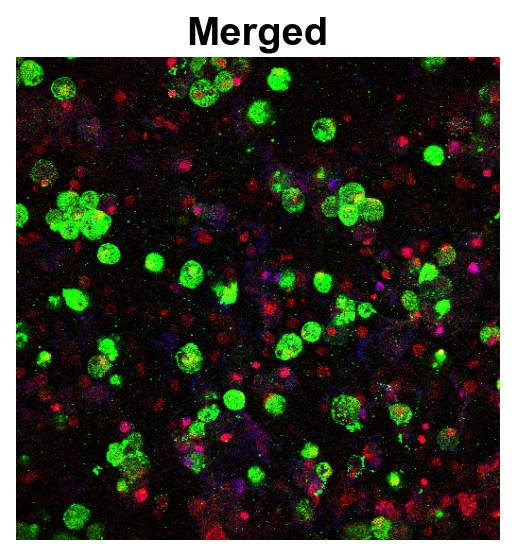

In [13]:
plt.imshow(cell_im)
plt.title('Merged')
plt.axis('off')

Now let's view the channels separately, a common technique in image processing.

(-0.5, 511.5, 511.5, -0.5)

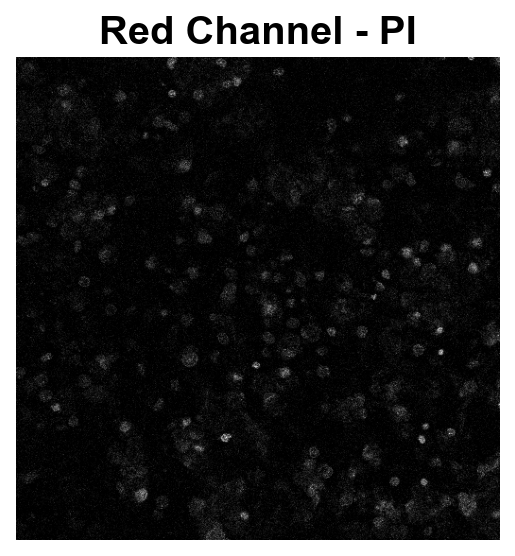

In [14]:
plt.imshow(red_cell_im, cmap='gray')
plt.title('Red Channel - PI')
plt.axis('off')

If we wanted to view all the channels and the merged image, we can use a `for` loop.

In [15]:
im_list = [red_cell_im, green_cell_im, blue_cell_im, cell_im]
title_list = ['Red Channel - PI', 'Green Channel - Iba1',
              'Blue Channel - DAPI', 'Merged']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


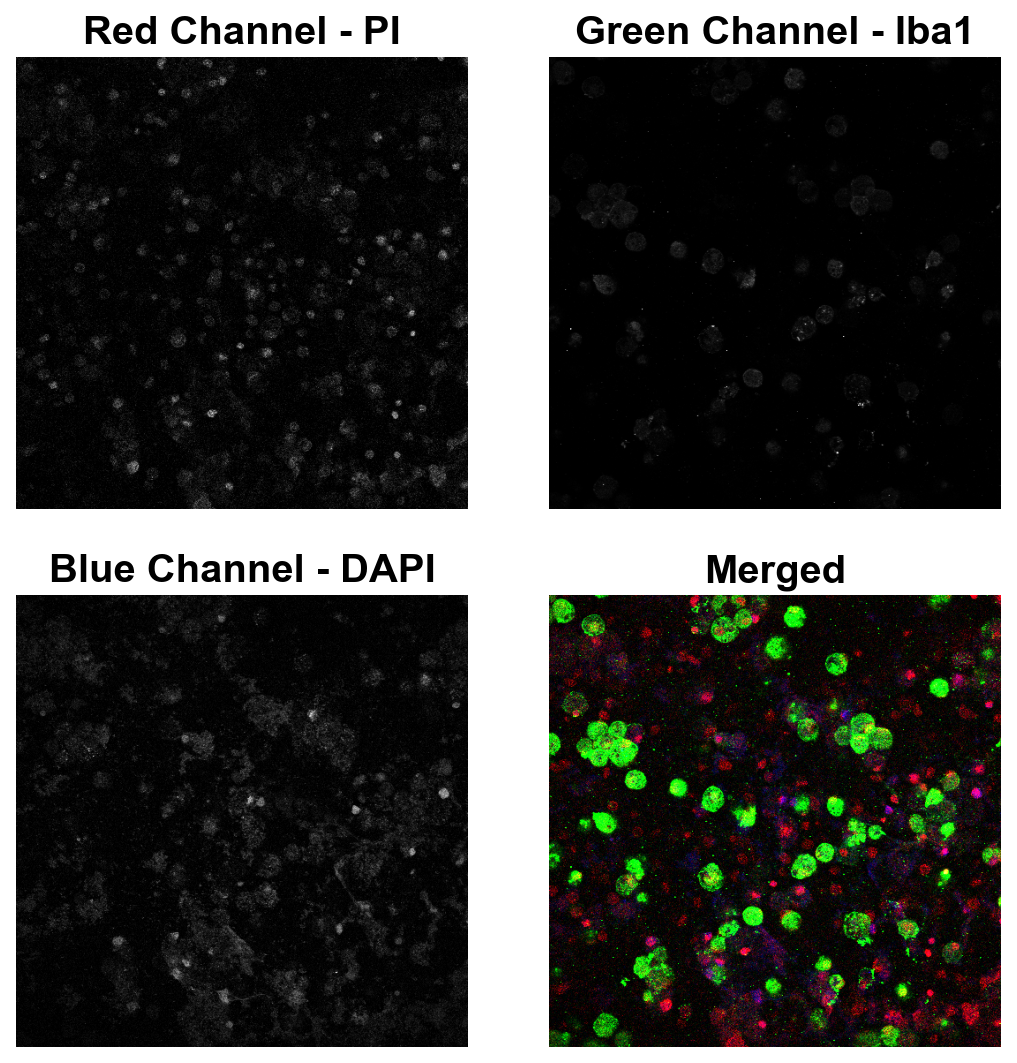

In [16]:
row, col = 2, 2
fig, axs = plt.subplots(row, col, figsize=(7, 7))
for row_i in range(row):
    for col_i in range(col):
        i = row_i * col + col_i  # counter
        axs[row_i, col_i].imshow(im_list[i], cmap='gray')  # display image
        axs[row_i, col_i].set_title(title_list[i])
        axs[row_i, col_i].axis('off')
plt.tight_layout()

## Conclusion

In this module, we learned the presentation of images as numbers in computers, split image channels, and visualized the images. 

```{admonition} Python Skills
:class: tip
- `skimage.io.imread()` - read image
- `matplotlib.pyplot.imshow()` - visualize image
```

In the next module, we will explore the power of threshold.

## Testing things `scipy.io.imread()`

In [ ]:
scip.io.imread()